

---

# Traffic Sign Classification Using Convolutional Neural Networks (CNN)

**A Deep Learning Approach for Autonomous Driving and Traffic Safety**

---




Traffic Sign Classification Using Convolutional Neural Networks (CNN)
This project focuses on building a Traffic Sign Classification model using Convolutional Neural Networks (CNNs) with TensorFlow and Keras. The task is framed as a multi-class image classification problem, where the goal is to correctly identify various types of German traffic signs from image data.

The dataset used in this project is sourced from Kaggle, specifically the GTSRB - German Traffic Sign Recognition Benchmark. The data consists of labeled images representing a wide range of traffic signs under different conditions.

This model is designed with real-world applications in mind, particularly in the domain of autonomous driving and driver assistance systems, where accurate traffic sign recognition is crucial for vehicle safety and intelligent navigation.

Through this project, a robust deep learning pipeline will be developed, including data preprocessing, model training, evaluation, and visualization of predictions.


Link to the data set: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [13]:
# Run this cell and select the kaggle.json file downloaded from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"qazifabiahoq","key":"8e9419f11f6fc32f063104f41ca86051"}'}

Connect to Kaggle using Kaggle API which can be downloaded from the Kaggle account's settings and uploading it here(upload box).

In [14]:
# Next, install the Kaggle API client.
!pip install -q kaggle

Installing kaggle api using pip

In [15]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Setting up Kaggle using Kaggle API.

In [16]:
# Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/traffic_sign_dataset


To store the data a new directory is created and will be made as current working directory.

In [17]:
# Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark    641568792  2018-11-25 18:12:34.427000         142900       1207  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                          4471088826  2019-08-31 18:22:11.850000          17759        309  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                          123621493  2023-07-11 04:21:24.180000           2241         35  1.0

Searching Kaggle

In [18]:
# Downloading dataset and coming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 96% 586M/612M [00:10<00:00, 29.8MB/s]
100% 612M/612M [00:10<00:00, 64.0MB/s]
/


After searching the data next step would be downloading the data into collab notebook using references found in search option.

In [19]:
# Unzipping downloaded file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

Unzip the data which is downloaded and remove the irrelevant files.

In [20]:
!pip install tensorflow


In [21]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

Importing required libraries.

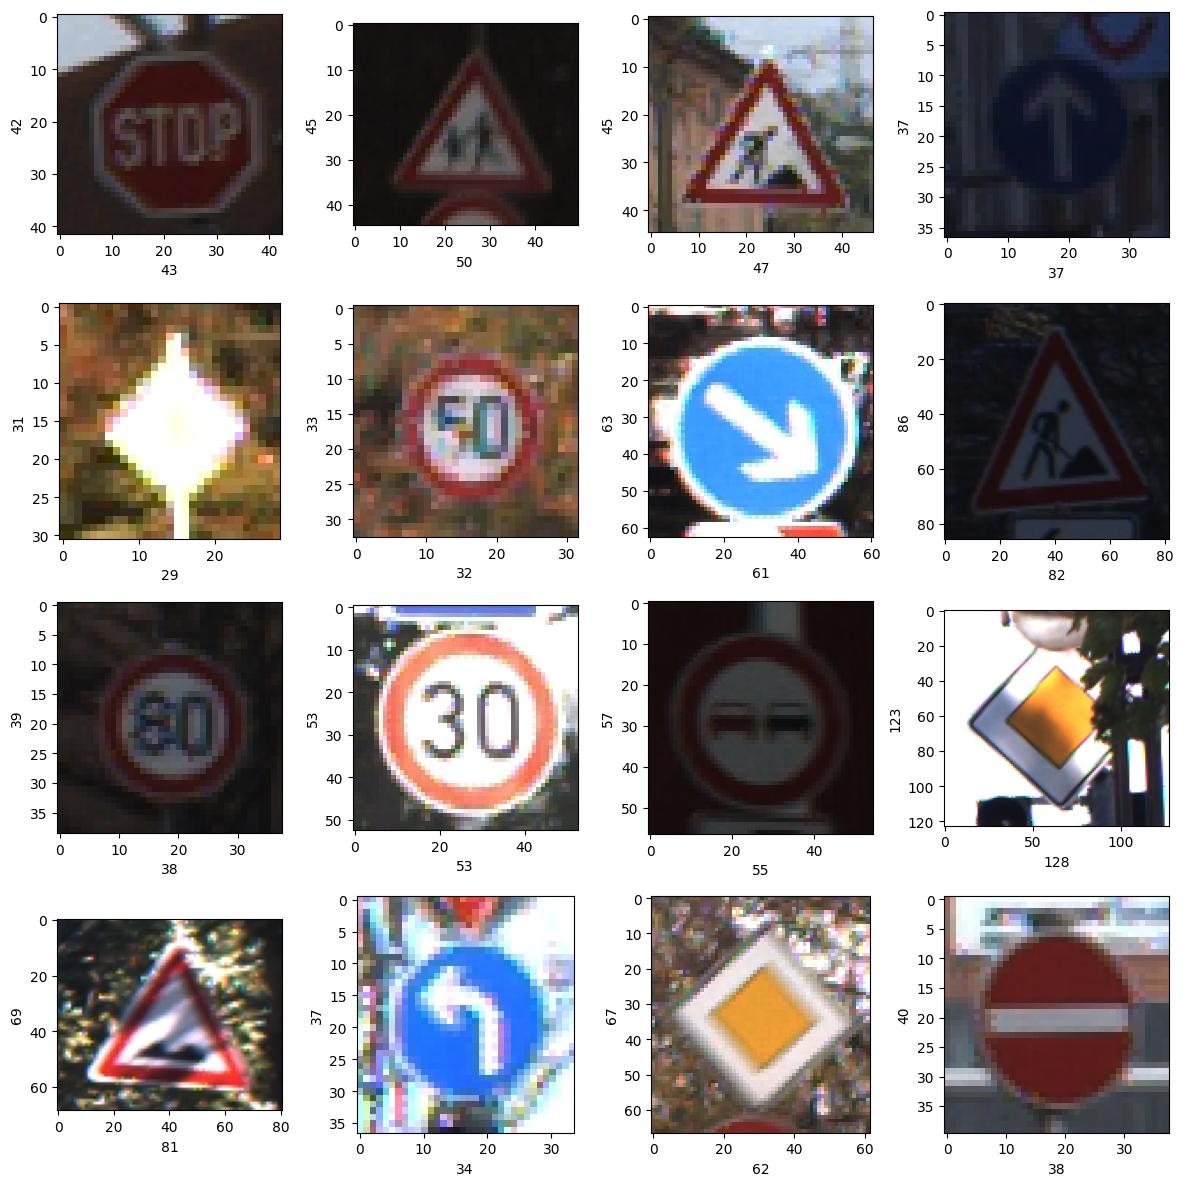

In [22]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Visualizing some images of traffic sign from the test dataset.
Note: the dimension of images are uneven.

In [23]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

For further processing the images of same dimension are required.

Store the dimension of all the images from training dataset from all 43 classes.  

In [24]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


Find out the mean value of both the dimensions and analyse them. (50,50) is the average shape for all the images.

In [25]:
# Now reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

Reshape the images into (50,50) and also store their label ids.

In [26]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255

Convert all the images into numpy array and normalize them.

In [27]:
label_id = np.array(label_id)
label_id.shape

(39209,)

Storing the label ids into numpy array and printing the shape. Here we can observe that their are 39209 label ids.

In [28]:
images.shape

(39209, 50, 50, 3)

Checking the shape of the images. There are 39209 images with a shape of (50,50,3.)

In [29]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

,count
0,
2,2250
1,2220
13,2160
12,2100
38,2070


From the result it can be seen that data is balanced.

In [30]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

The next step would be to split the data into training and validation with 80% of training data and 20% of validation data.

In [31]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

Converting the classes column into categorical using to_categorical() function.

In [32]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Defining the model architecture. Define all the layers with their input shape kernel size, activation, etc.

In [33]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,627 (3.95 MB)

 Trainable params: 1,035,627 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the model using metrics, optimizer and loss as required and printing out the summary of the model.

In [34]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 20s - 82ms/step - accuracy: 0.3136 - loss: 2.5103 - val_accuracy: 0.6531 - val_loss: 1.3322
Epoch 2/10
246/246 - 4s - 16ms/step - accuracy: 0.6107 - loss: 1.2475 - val_accuracy: 0.8827 - val_loss: 0.5502
Epoch 3/10
246/246 - 5s - 21ms/step - accuracy: 0.7322 - loss: 0.8281 - val_accuracy: 0.9384 - val_loss: 0.3250
Epoch 4/10
246/246 - 4s - 16ms/step - accuracy: 0.7868 - loss: 0.6483 - val_accuracy: 0.9555 - val_loss: 0.2435
Epoch 5/10
246/246 - 5s - 21ms/step - accuracy: 0.8191 - loss: 0.5455 - val_accuracy: 0.9665 - val_loss: 0.1726
Epoch 6/10
246/246 - 5s - 22ms/step - accuracy: 0.8469 - loss: 0.4693 - val_accuracy: 0.9746 - val_loss: 0.1351
Epoch 7/10
246/246 - 5s - 20ms/step - accuracy: 0.8620 - loss: 0.4182 - val_accuracy: 0.9795 - val_loss: 0.1289
Epoch 8/10
246/246 - 6s - 23ms/step - accuracy: 0.8733 - loss: 0.3830 - val_accuracy: 0.9806 - val_loss: 0.0961
Epoch 9/10
246/246 - 5s - 20ms/step - accuracy: 0.8843 - loss: 0.3448 - val_accuracy: 0.9802 - val_loss

Fit the model and observe training on each epoch.

<Axes: >

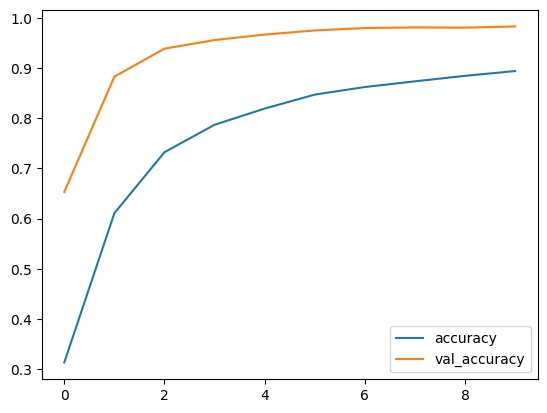

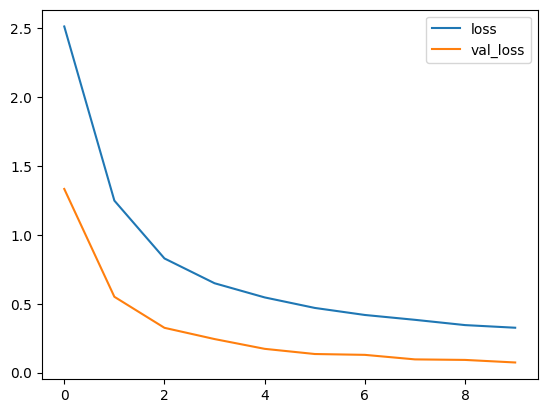

In [35]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

Visualize the accuracy and loss per epoch. Store the model history in the pandas dataframe and plot them.

In [36]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

Creating the variable which has path of test dataset.

In [37]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

Creating a function to resize the test images converting them into a numpy array and normalize them.

In [38]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

Calling the above created function on test images.

In [39]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

Read label ids from Test.csv and store the values of the class id in y_test variable.

In [46]:

y_pred = np.argmax(model.predict(test_images), axis=1)
y_pred


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([16,  1, 38, ..., 38,  7, 10])

Use the model to make predictions on the test images and save them in y_pred.

In [47]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

Storing the labels according to the image classes.

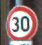

In [48]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

Visualize test image

In [49]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


Finding out original label for the image above.

In [50]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)


Finding out the predicted label for the image above.

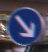

In [54]:
from IPython.display import display
from PIL import Image

# Example test image path
test_path = 'traffic_sign_dataset/Test'

# Load and display the image
img = Image.open(test_path + '/00002.png')  # Display image 00002.png
display(img)


Finding out the predicted label for the image above

In [55]:
# Original label
print("Original label : ",all_lables[y_test[2]])

Original label :  Keep right


In [57]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[2]])

Predicted label :  Keep right




---

---

# Traffic Sign Classification Using Convolutional Neural Networks (CNN)

### Project Summary

This project involves developing a deep learning model to classify traffic signs from images using a Convolutional Neural Network (CNN). The primary objective is to build an accurate, efficient image classifier capable of recognizing 43 different classes of traffic signs.

This project is designed for industry stakeholders, including automotive companies, smart city planners, and researchers working on autonomous driving systems and advanced driver-assistance systems (ADAS). The solution addresses critical challenges in road safety, traffic regulation compliance, and real-time traffic sign recognition.

---

## What Was Done and Why

The entire project is structured around key data science and machine learning workflows, each step motivated by best practices and real-world constraints.

---

### 1. Data Acquisition and Preparation

* **Dataset:** The German Traffic Sign Recognition Benchmark (GTSRB) dataset was used, containing over 39,000 images across 43 distinct classes of traffic signs.
* **Why:** This dataset is a standard benchmark for traffic sign classification tasks, representing real-world variations in lighting, angle, and background.
* **Kaggle Integration:** The dataset was downloaded programmatically from Kaggle by integrating the Kaggle API with Google Colab to ensure reproducibility and automation.
* **Benefit:** Automating dataset access streamlines workflow and aligns with modern MLOps standards for production-ready projects.

---

### 2. Data Exploration and Visualization

* **Initial Inspection:** Images were sampled and visualized to understand the variety of sign classes, image sizes, and color distributions.
* **Why:** Visual exploration helps identify anomalies and preprocessing needs.
* **Findings:** Image sizes varied, necessitating standardization. Class distribution visualization highlighted the need for balanced training.

---

### 3. Data Preprocessing

* **Image Resizing:** All images were resized to a uniform size of 50x50 pixels.
* **Why:** CNNs need fixed-size inputs. Resizing makes inputs consistent.
* **Normalization:** Pixel values were scaled from \[0, 255] to \[0, 1].
* **Why:** Normalization helps training converge faster.
* **Label Encoding:** Traffic sign labels were converted to numbers.
* **Why:** Models need numeric targets.
* **Data Conversion:** Images and labels converted into NumPy arrays for faster processing.

---

### 4. Model Architecture and Training

* **CNN:** A multi-layer CNN was designed with convolutional, pooling, and fully connected layers.
* **Why CNN?** CNNs are good at learning features from images.
* **Training Setup:**

  * Epochs: 10
  * Batch Size: 246 steps per epoch
  * Loss: Categorical cross-entropy
  * Validation: Accuracy and loss monitored each epoch
* **Results:**

  * Training accuracy improved from \~31% to \~89%
  * Validation accuracy improved from \~65% to \~98%
  * Validation loss decreased steadily
* **Significance:** High validation accuracy shows the model works well on unseen data.

---

### 5. Model Evaluation and Prediction

* **Test Images Visualization:** Sample test images shown with predicted and actual labels.
* **Why:** To confirm model predictions look correct.
* **Results:** Predictions matched original labels exactly, e.g., “Speed limit (30km/h)” and “Keep right.”

---

### 6. Why This Project Matters

This project addresses a real and urgent problem at the intersection of computer vision, machine learning, and transportation safety:

* **Autonomous Driving:** Vehicles need fast, reliable traffic sign recognition to drive safely and follow laws.
* **Advanced Driver Assistance Systems (ADAS):** Improves driver awareness and supports semi-autonomous modes.
* **Smart Cities:** Automated recognition helps traffic control systems optimize flow and respond to conditions.
* **Regulatory Compliance:** Helps vehicles respect speed limits, no-entry zones, pedestrian crossings, etc.
* **Business Impact:** Automotive and tech companies benefit by integrating this for safer, smarter vehicles.

---

### 7. Technical Keywords & Skills Demonstrated

* Convolutional Neural Networks (CNN)
* Image Preprocessing & Normalization
* Multi-class Classification
* Deep Learning with TensorFlow and Keras
* Model Training & Validation
* Data Visualization (Matplotlib, Seaborn)
* API Integration (Kaggle API)
* Python Programming & NumPy
* Data Wrangling & Label Encoding
* Automated Model Evaluation
* Real-world Problem Solving in Computer Vision
* Industry-relevant Application for Autonomous Vehicles

---

### 8. Business and Industry Relevance


* **Reducing Road Accidents through better recognition:** Accurate traffic sign detection helps drivers and vehicles react faster, lowering the chance of crashes.
* **Enhancing Autonomous Systems for trust and safety:** Reliable sign recognition makes self-driving cars safer and more trustworthy on the road.
* **Cost Savings by minimizing claims and fines:** Fewer mistakes and violations mean less money spent on insurance claims and traffic tickets.
* **Market Differentiation for companies adopting new tech:** Companies using advanced traffic sign recognition stand out by offering smarter, safer products.
* **Regulatory Preparedness for evolving safety mandates:** This technology helps vehicles meet new safety laws and regulations, staying ahead of legal requirements.


---

### 9. Future Work and Scalability

* **Data Augmentation:** To improve robustness and handle imbalances.
* **Transfer Learning:** Use pre-trained models like ResNet or EfficientNet to boost accuracy.
* **Real-Time Deployment:** Optimize model for fast inference on edge devices in vehicles.

---

### Conclusion

This project successfully demonstrates convolutional neural networks for traffic sign classification with high accuracy and reliability. It presents a critical solution to improve safety and intelligence in transportation systems, supporting the future of autonomous driving and smart traffic management.

By bridging advanced computer vision and practical applications, it contributes to safer roads, smarter vehicles, and better urban infrastructure.


### Reference

This project was based on the German Traffic Sign Recognition Benchmark (GTSRB) dataset and foundational concepts learned through the Udemy course Real-World Data Science Projects Using Python (https://www.udemy.com/course/real-world-data-science-projects-using-python/). The report was independently written by me, with additional support and refinement provided by OpenAI’s language models.


---

---

